In [209]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib. pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout,GRU
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.models import load_model
from keras.layers import LSTM
from keras.optimizers import Adam,AdamW

In [210]:
nRowsRead = 3000 
df = pd.read_csv('/kaggle/input/stock-data/Data/AARTIIND.BO.csv', delimiter=',')#,nrows = nRowsRead
df.dataframeName = 'AARTIIND.BO.csv'
nRow, nCol = df.shape

In [211]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-07-01,5.525,5.750,5.525,5.680,0.100826,2538
1,2002-07-02,5.710,5.835,5.710,5.715,0.101447,1468
2,2002-07-03,5.915,5.915,5.680,5.720,0.101536,2160
3,2002-07-04,5.670,5.750,5.625,5.645,0.100205,2440
4,2002-07-05,5.750,5.750,5.630,5.730,0.101713,4370


In [212]:
df.shape

(4411, 7)

In [213]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<Axes: >

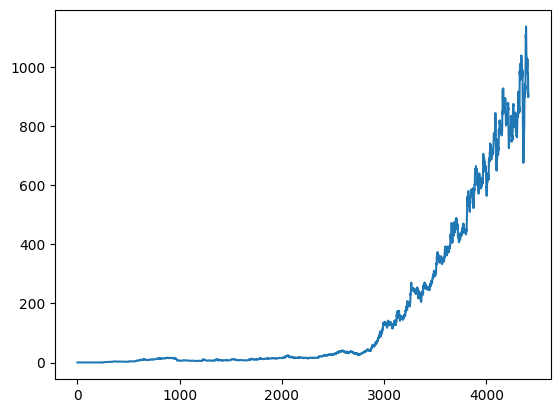

In [214]:
df["Adj Close"].plot()

In [215]:
output_var = pd.DataFrame(df["Adj Close"])
features = ["Open", 'High', "Low", "Volume"]

In [216]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
0,0.001032,0.001015,0.001081,0.000346
1,0.001193,0.001087,0.001249,0.000200
2,0.001371,0.001154,0.001222,0.000294
3,0.001158,0.001015,0.001172,0.000333
4,0.001228,0.001015,0.001176,0.000596


In [217]:
from sklearn.model_selection import TimeSeriesSplit
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [218]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [219]:
import tensorflow as tf
model = Sequential()
model.add(GRU(128, return_sequences=True, input_shape=(1, trainX.shape[1]), activation="relu"))
model.add(GRU(128,activation = 'relu'))
model.add(Dense(10))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam())

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [220]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_8 (GRU)                     │ (None, 1, 128)         │        51,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_9 (GRU)                     │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,829 (593.08 KB)

 Trainable params: 151,829 (593.08 KB)

 Non-trainable params: 0 (0.00 B)

In [221]:
historyGRU=model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=1, shuffle=True,validation_split = 0.2)

Epoch 1/1000
101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 1793.1255 - val_loss: 132088.0625
Epoch 2/1000
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1009.0521 - val_loss: 74441.4609
Epoch 3/1000
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 564.5388 - val_loss: 469.4901
Epoch 4/1000
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.4629 - val_loss: 2792.5801
Epoch 5/1000
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.4018 - val_loss: 2694.1970
Epoch 6/1000
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.3540 - val_loss: 2375.3523
Epoch 7/1000
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.6481 - val_loss: 1546.8091
Epoch 8/1000
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.6247 - val_loss: 1206.0756
Epoch 9/1000
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.6040 - val_loss: 1091.5137
Epoch 10/1000
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.1448 - val_loss: 1050.2094
Epoch 11/1000
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.4143 

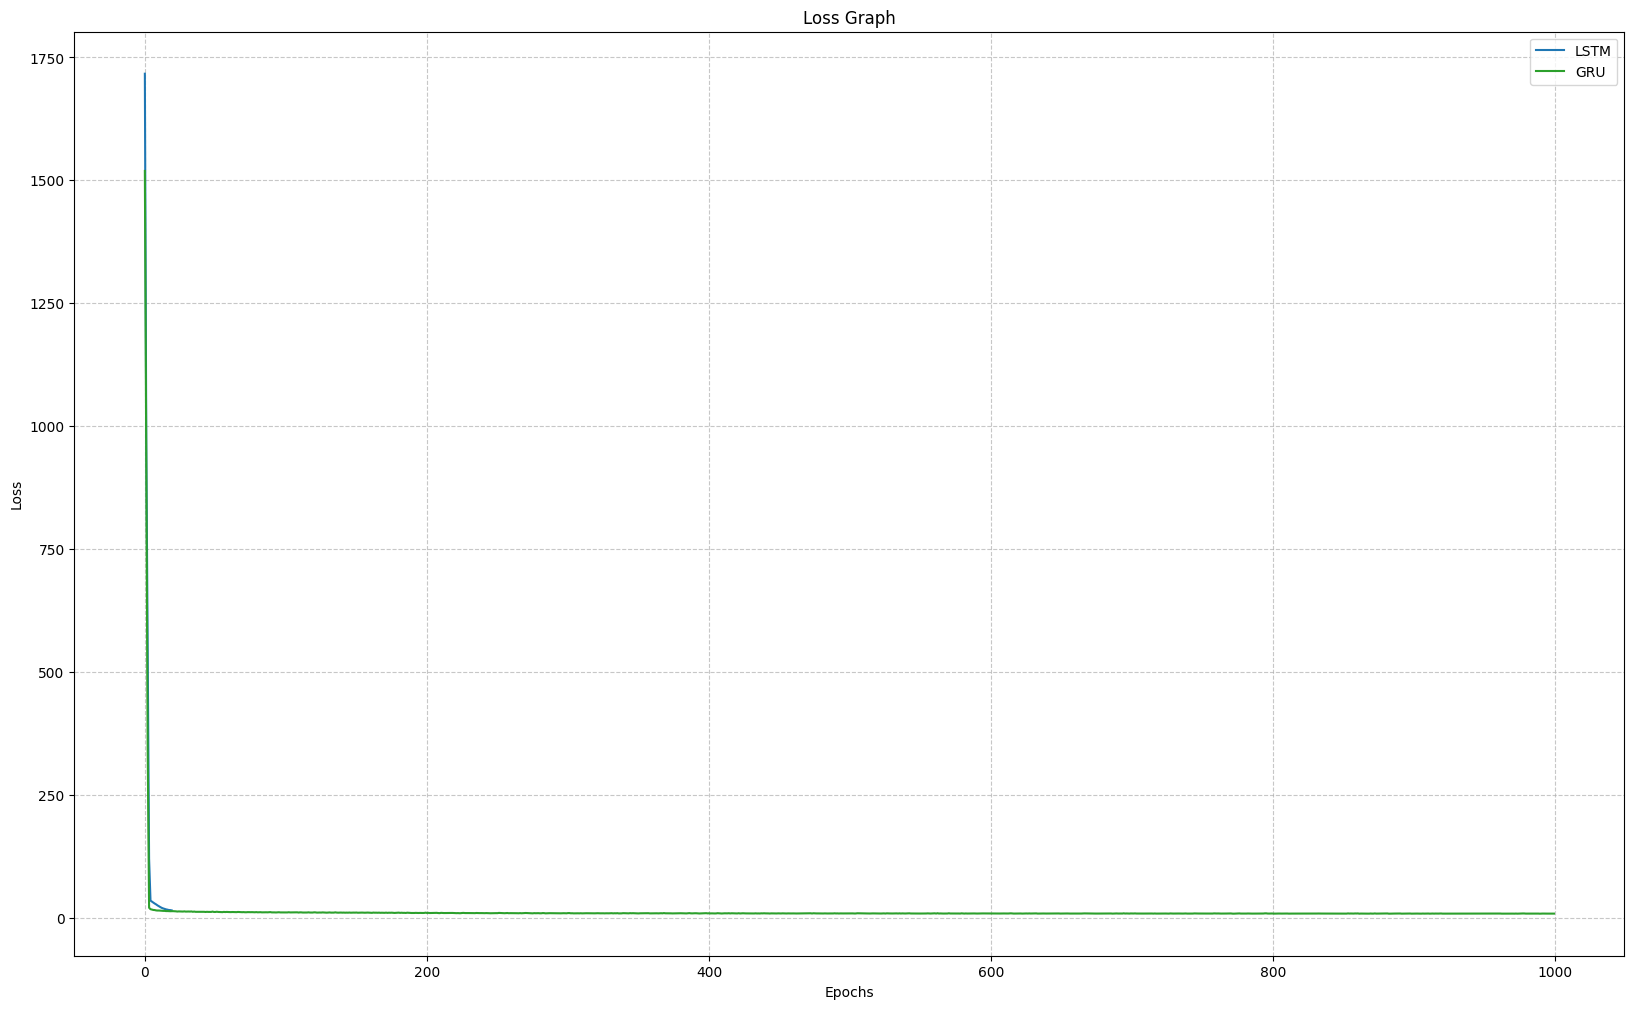

In [229]:
import matplotlib.pyplot as plt


fig1 = plt.figure(figsize=(20, 12))


colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

plt.plot(historyLSTM.history['loss'], color=colors[0], label='LSTM', linestyle='-')
plt.plot(historyGRU.history['loss'], color=colors[2], label='GRU', linestyle='-')
plt.grid(True, linestyle='--', alpha=0.7)  
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

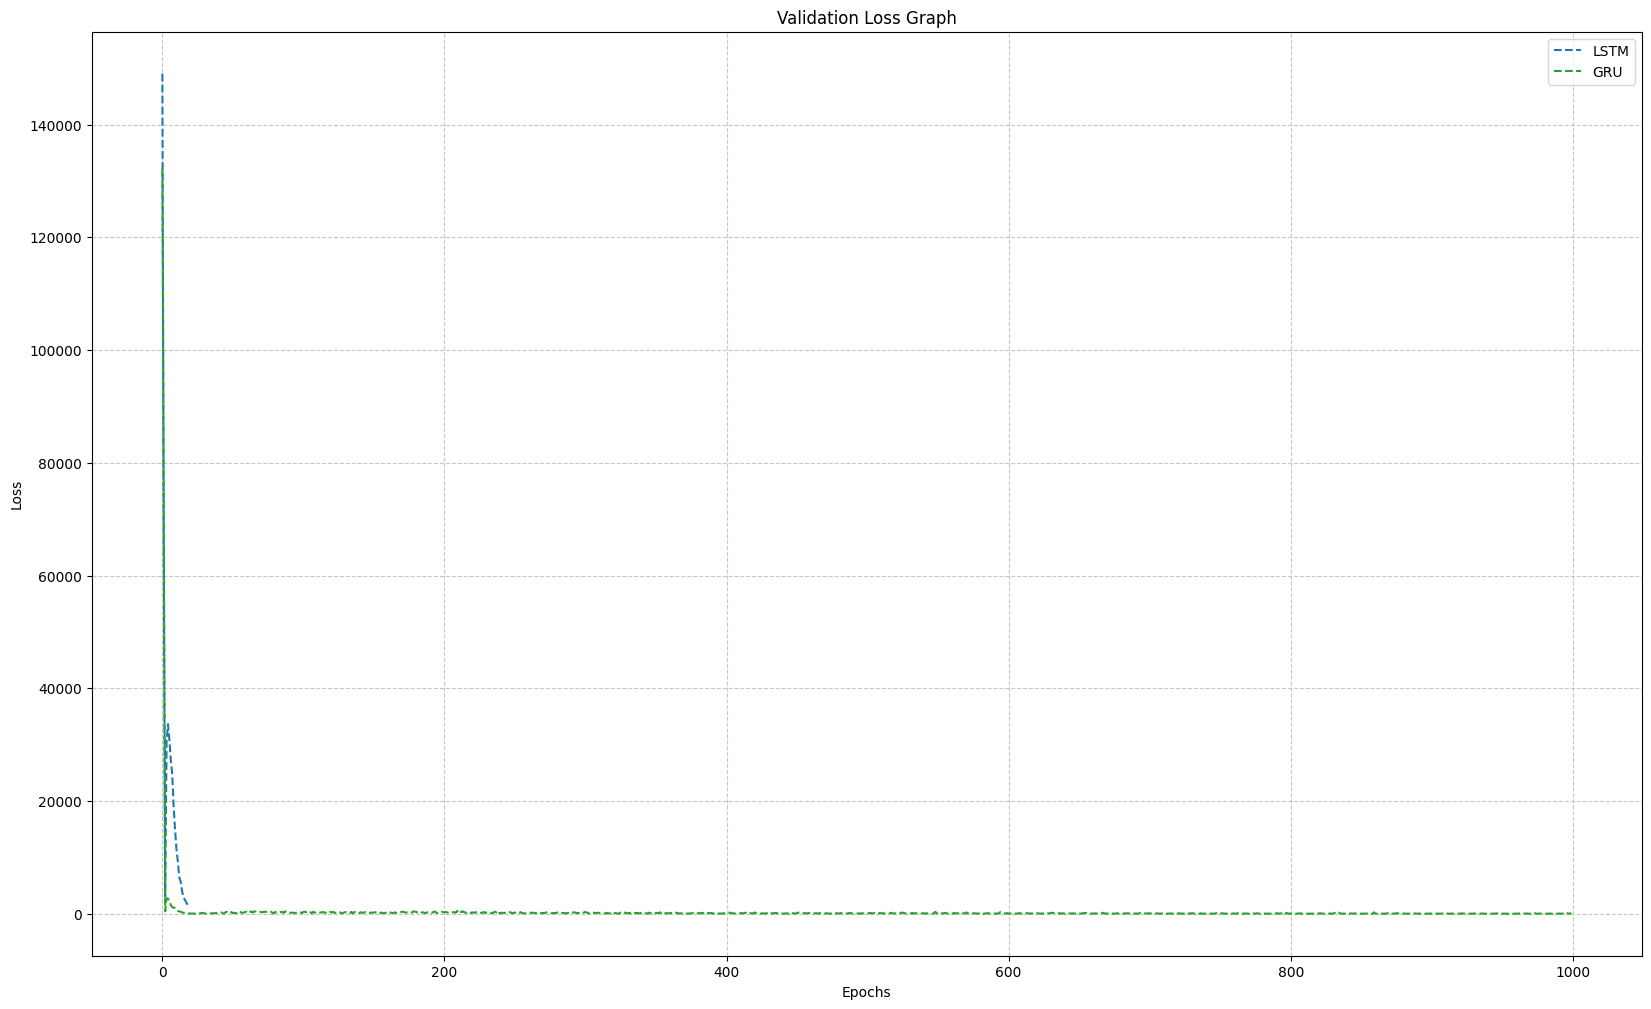

In [230]:
import matplotlib.pyplot as plt


fig1 = plt.figure(figsize=(20, 12))


colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

plt.plot(historyLSTM.history['val_loss'], color=colors[0], label='LSTM', linestyle='--')
plt.plot(historyGRU.history['val_loss'], color=colors[2], label='GRU', linestyle='--')
plt.grid(True, linestyle='--', alpha=0.7)  
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss Graph')
plt.legend()
plt.show()

In [231]:
y_pred= model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


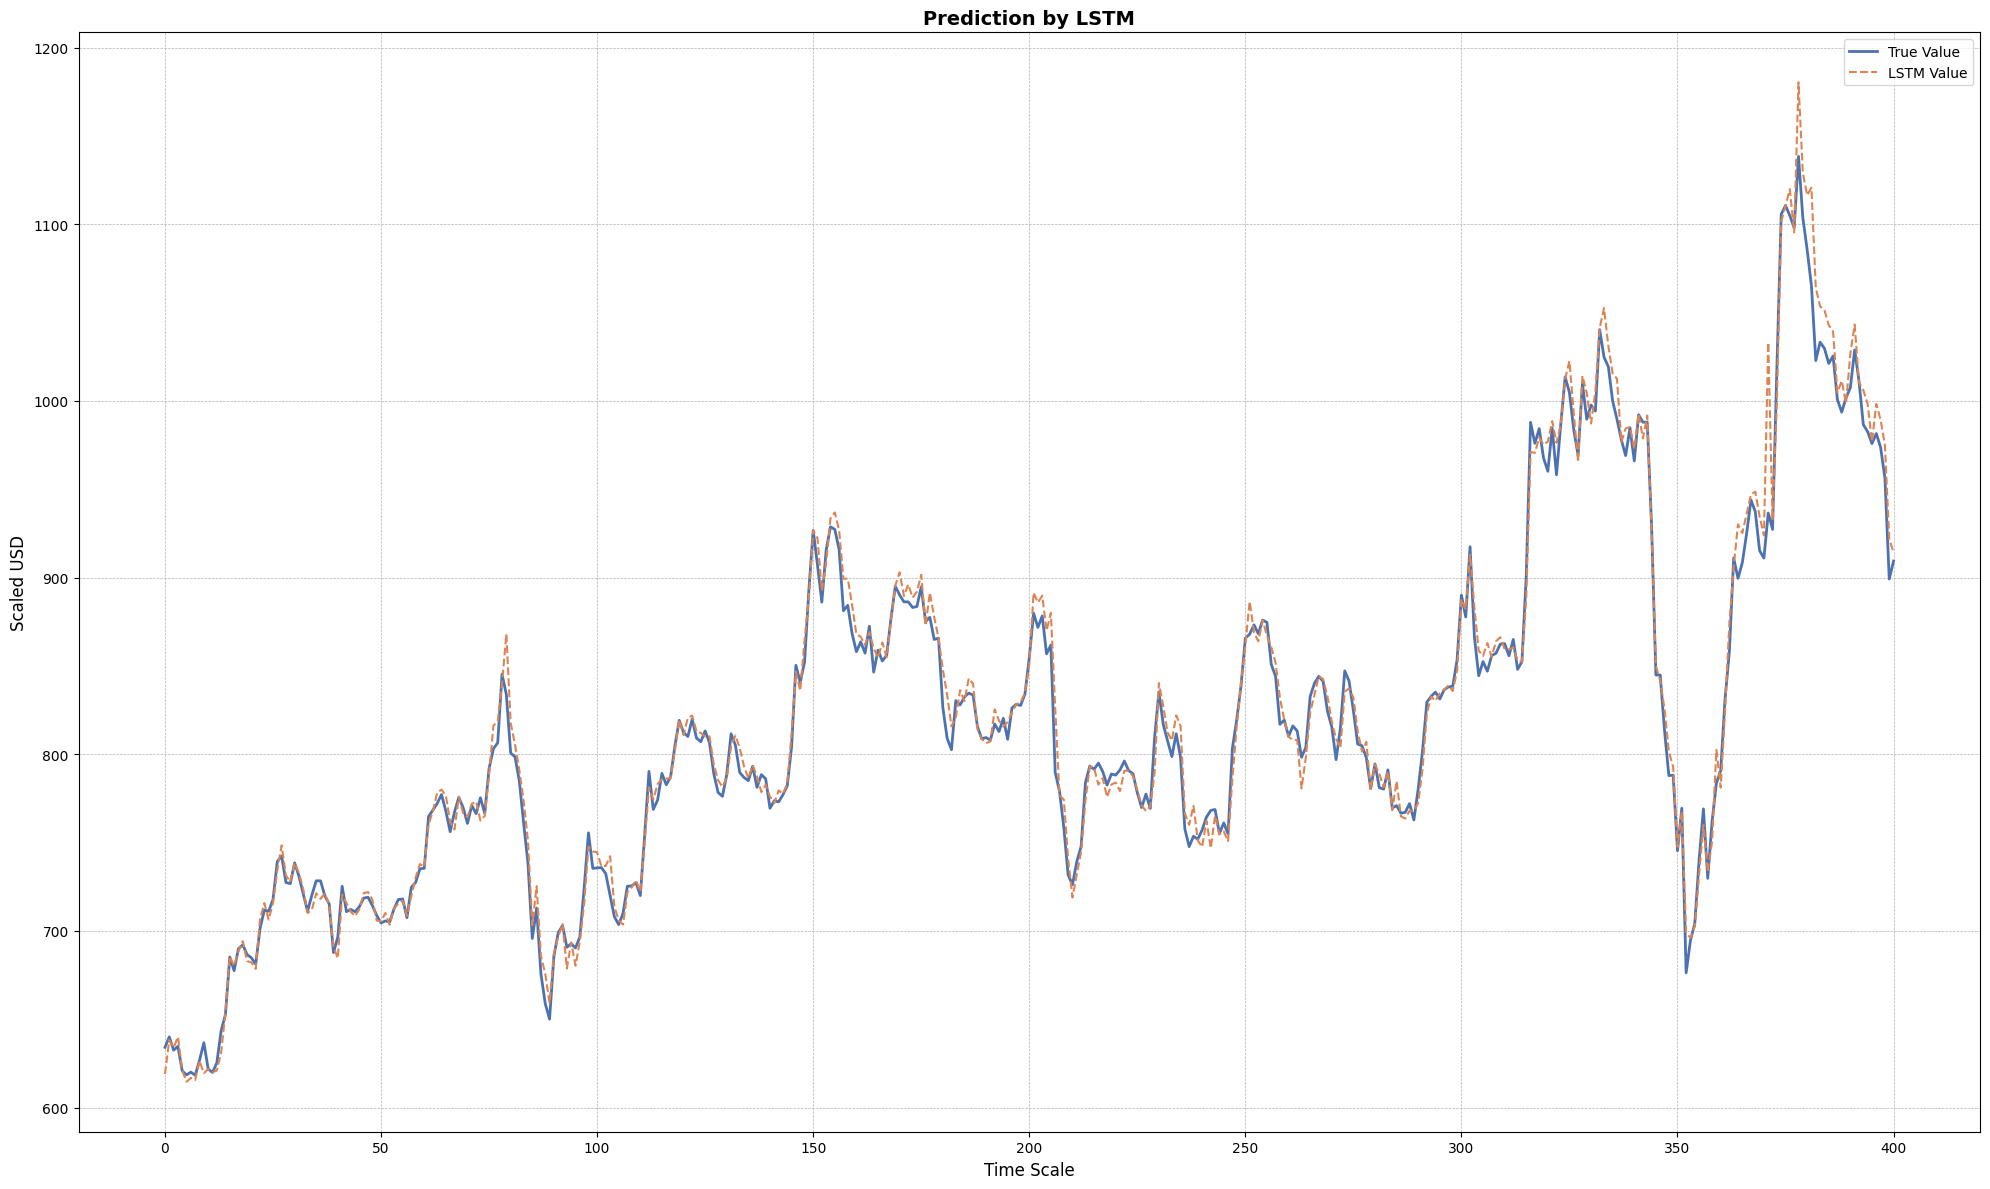

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample color palette
palette = sns.color_palette("deep")

fig1 = plt.figure(figsize=(20, 12))

plt.plot(y_test, label="True Value", color=palette[0], linewidth=2)
plt.plot(y_pred, label="LSTM Value", color=palette[1], linestyle='--')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.title("Prediction by LSTM", fontsize=14, fontweight='bold')
plt.xlabel("Time Scale", fontsize=12)
plt.ylabel("Scaled USD", fontsize=12)
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
plt.tight_layout()